In [73]:
# regular imports
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [74]:
# display related imports
from IPython.display import display, Image, clear_output, HTML, IFrame

# Widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# to save dataframe as an image
import dataframe_image as dfi

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Forest
from sklearn.tree import DecisionTreeClassifier

In [75]:
accepted = pd.read_pickle('data/accepted_for_credit.pkl')

In [76]:
accepted.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year,issue_month,fico,term_60,years_since_earliest_credit
0,3600.0,3600.0,3600.0,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,PA,5.91,0.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,12,3,0,12
1,24700.0,24700.0,24700.0,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,SD,16.06,1.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cas

In [77]:
accepted.shape

(2260668, 149)

In [78]:
accepted.recoveries.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: recoveries, dtype: float64

In [79]:
[print (col) for col in accepted.columns]

loan_amnt
funded_amnt
funded_amnt_inv
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
addr_state
dti
delinq_2yrs
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_u

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [80]:
accepted.iloc[13]
# looking at one record 'charged off'

loan_amnt                                                                                 18000
funded_amnt                                                                               18000
funded_amnt_inv                                                                           18000
int_rate                                                                                  19.48
installment                                                                               471.7
grade                                                                                         E
sub_grade                                                                                    E2
emp_title                                                                      Software Manager
emp_length                                                                              7 years
home_ownership                                                                             RENT
annual_inc                              

In [81]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [82]:
col_ = [
    'loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'int_rate',
'installment',
'grade',
'sub_grade',
'issue_d',
'loan_status',
    'dti',
    'application_type',
    'last_pymnt_d',
'annual_inc_joint',
'dti_joint',
'pymnt_plan',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'hardship_flag',
'hardship_type',
'hardship_reason',
'hardship_status',
'deferral_term',
'hardship_amount',
'hardship_start_date',
'hardship_end_date',
'payment_plan_start_date',
'hardship_length',
'hardship_dpd',
'hardship_loan_status',
'orig_projected_additional_accrued_interest',
'hardship_payoff_balance_amount',
'hardship_last_payment_amount',
'disbursement_method',
'debt_settlement_flag',
'debt_settlement_flag_date',
'settlement_status',
'settlement_date',
'settlement_amount',
'settlement_percentage',
'settlement_term',
'issue_year',
'issue_month',
'fico',
'term_60'
]

In [171]:
#df = accepted[col_].copy()
df = accepted.copy()

In [172]:
df.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year,issue_month,fico,term_60,years_since_earliest_credit
0,3600.0,3600.0,3600.0,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,PA,5.91,0.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.000,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,12,3,0,12
1,24700.0,24700.0,24700.0,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,SD,16.06,1.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.000,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [173]:
df['last_pay_d'] = pd.to_datetime(df['last_pymnt_d'])

df['months_of_pay'] = [dt_ for dt_ in ((df['last_pay_d'] - df['issue_d'])/np.timedelta64(1,'M'))]
df['months_of_pay'].fillna(0, inplace=True)
df['months_of_pay'] = (df['months_of_pay']).astype('int64') - 1

In [174]:
df.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year,issue_month,fico,term_60,years_since_earliest_credit,last_pay_d,months_of_pay
0,3600.0,3600.0,3600.0,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,PA,5.91,0.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.000,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,12,3,0,12,2019-01-01,36
1,24700.0,24700.0,24700.0,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,SD,16.06,1.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.000,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,

In [175]:
df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [176]:
df.groupby('loan_status')['loan_amnt'].count()

loan_status
Charged Off                                             268559
Current                                                 878317
Default                                                     40
Does not meet the credit policy. Status:Charged Off        761
Does not meet the credit policy. Status:Fully Paid        1988
Fully Paid                                             1076751
In Grace Period                                           8436
Late (16-30 days)                                         4349
Late (31-120 days)                                       21467
Name: loan_amnt, dtype: int64

In [177]:
# change status to either charge off or Fully paid
df.loc[(df.loan_status == 'Does not meet the credit policy. Status:Fully Paid'),'loan_status'] = 'Fully Paid'
df.loc[(df.loan_status == 'Does not meet the credit policy. Status:Charged Off'),'loan_status'] = 'Charged Off' 

In [178]:
df.loan_status.unique()


array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [179]:
#df.groupby(['issue_year', 'grade', 'loan_status'])['loan_amnt'].count()

In [180]:
df['loan_status'] = (['Not Current' if x in
                      ['In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)', 'Default'] else x
                     for x in df['loan_status']])

In [181]:
df.loan_status.head(15)

0      Fully Paid
1      Fully Paid
2      Fully Paid
3         Current
4      Fully Paid
5      Fully Paid
6      Fully Paid
7      Fully Paid
8      Fully Paid
9      Fully Paid
10        Current
11        Current
12     Fully Paid
13    Charged Off
14     Fully Paid
Name: loan_status, dtype: object

In [182]:
# This takes awhile - would like to find a quicker method
df['loss_amnt'] = [0 if x != 'Charged Off' else ((df.iloc[i]['loan_amnt'])
                                                 - (int(df.iloc[i]['total_pymnt_inv'])
                                                    + (int(df.iloc[i]['total_rec_late_fee']))
                                                   + int(df.iloc[i]['recoveries'])
                                                - int(df.iloc[i]['collection_recovery_fee']))) for i, x in enumerate(df['loan_status'])] 
                                                            

In [183]:
col_ = 'sub_grade'
print('Return Percent')
loan_amnt =df[df['issue_year']<2015].groupby(col_)['loan_amnt'].sum()
rec_amnt = df[df['issue_year']<2015].groupby(col_)['total_pymnt_inv'].sum()
print((rec_amnt - loan_amnt)/loan_amnt)

Return Percent
sub_grade
A1    0.065282
A2    0.065166
A3    0.072359
A4    0.071165
A5    0.079371
B1    0.089364
B2    0.098188
B3    0.104826
B4    0.109391
B5    0.104691
C1    0.112987
C2    0.123942
C3    0.128601
C4    0.130921
C5    0.135897
D1    0.130687
D2    0.126339
D3    0.128811
D4    0.131902
D5    0.141757
E1    0.137947
E2    0.134371
E3    0.143373
E4    0.135832
E5    0.138045
F1    0.154730
F2    0.151133
F3    0.131498
F4    0.126529
F5    0.131602
G1    0.117817
G2    0.131199
G3    0.119522
G4    0.105445
G5    0.073283
dtype: float64


<AxesSubplot:xlabel='sub_grade'>

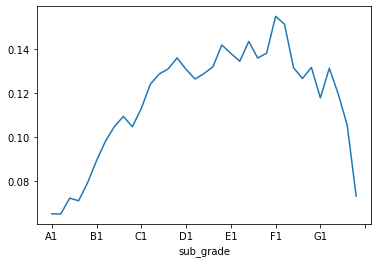

In [184]:
yield_curve = ((rec_amnt - loan_amnt)/loan_amnt)

yield_curve.plot()

In [185]:
col = ['fico', 'issue_year', 'grade', 'sub_grade']
print('Percent of loans that default by different categories')
for col_ in col:
    loan_amnt = df.groupby(col_)['loan_amnt'].sum()
    loss_amnt = df.groupby(col_)['loss_amnt'].sum()
    print(loss_amnt/loan_amnt)
    print('_'*50)

Percent of loans that default by different categories
fico
2    0.071815
3    0.049609
4    0.027723
5    0.020346
dtype: float64
__________________________________________________
issue_year
2007    0.273426
2008    0.192379
2009    0.074758
2010    0.057765
2011    0.061476
2012    0.052057
2013    0.040482
2014    0.050167
2015    0.065574
2016    0.071028
2017    0.055424
2018    0.015505
dtype: float64
__________________________________________________
grade
A    0.012559
B    0.030666
C    0.053311
D    0.077821
E    0.107386
F    0.137822
G    0.160777
dtype: float64
__________________________________________________
sub_grade
A1    0.006300
A2    0.009593
A3    0.011413
A4    0.014180
A5    0.019085
B1    0.023637
B2    0.024792
B3    0.031694
B4    0.033379
B5    0.038854
C1    0.044159
C2    0.049181
C3    0.051758
C4    0.060039
C5    0.062662
D1    0.070993
D2    0.075738
D3    0.077651
D4    0.082306
D5    0.086515
E1    0.101514
E2    0.106903
E3    0.105294
E4    0.11223

In [186]:

df_grouped = df.groupby(['issue_year', 'sub_grade', 'grade', 'loan_status', 'fico'])['loan_amnt'].count().reset_index()

In [187]:
df_grouped.tail(10)

,issue_year,sub_grade,grade,loan_status,fico,loan_amnt
3622,2018,G4,G,Current,2,6
3623,2018,G4,G,Current,3,11
3624,2018,G4,G,Fully Paid,2,1
3625,2018,G4,G,Fully Paid,3,2
3626,2018,G4,G,Not Current,2,2
3627,2018,G5,G,Charged Off,3,1
3628,2018,G5,G,Current,2,8
3629,2018,G5,G,Current,3,15
3630,2018,G5,G,Fully Paid,2,1
3631,2018,G5,G,Not Current,3,2


In [188]:
df_grouped_YGF = df_grouped.groupby(['issue_year', 'sub_grade', 'grade',  'fico'])['loan_amnt'].sum().reset_index()

In [189]:
new_df = pd.merge(df_grouped, df_grouped_YGF, how='left', 
                  left_on=['issue_year', 'grade', 'sub_grade', 'fico'], 
                  right_on=['issue_year', 'grade', 'sub_grade', 'fico'])

In [190]:
df_grouped_totals = new_df.rename(columns={'loan_amnt_x': 'status_total', 'loan_amnt_y': 'fico_total'})

In [191]:
df_grouped_totals.tail(10)

,issue_year,sub_grade,grade,loan_status,fico,status_total,fico_total
3622,2018,G4,G,Current,2,6,9
3623,2018,G4,G,Current,3,11,14
3624,2018,G4,G,Fully Paid,2,1,9
3625,2018,G4,G,Fully Paid,3,2,14
3626,2018,G4,G,Not Current,2,2,9
3627,2018,G5,G,Charged Off,3,1,18
3628,2018,G5,G,Current,2,8,9
3629,2018,G5,G,Current,3,15,18
3630,2018,G5,G,Fully Paid,2,1,9
3631,2018,G5,G,Not Current,3,2,18


In [192]:
df_grouped_totals['status_percent'] = [x for x in df_grouped_totals['status_total']/df_grouped_totals['fico_total']]

In [193]:
df_grouped_totals.head()

,issue_year,sub_grade,grade,loan_status,fico,status_total,fico_total,status_percent
0,2007,A1,A,Fully Paid,4,3,3,1.0
1,2007,A1,A,Fully Paid,5,3,3,1.0
2,2007,A2,A,Charged Off,4,2,20,0.1
3,2007,A2,A,Fully Paid,4,18,20,0.9
4,2007,A2,A,Fully Paid,5,6,6,1.0


In [194]:
fully_paid_percent = df_grouped_totals[df_grouped_totals['loan_status'] == 'Fully Paid']
charged_off_percent = df_grouped_totals[df_grouped_totals['loan_status']=='Charged Off']
current_percent = df_grouped_totals[df_grouped_totals['loan_status']=='Current']
not_current_percent = df_grouped_totals[df_grouped_totals['loan_status']=='Not Current']

In [195]:
#fully_paid_percent = df_grouped_totals.loc[df_grouped_totals['loan_status'] in ['Fully Paid', 'Current']]

In [196]:
fully_paid_percent.sort_values('status_percent', ascending=False).head()

,issue_year,sub_grade,grade,loan_status,fico,status_total,fico_total,status_percent
0,2007,A1,A,Fully Paid,4,3,3,1.0
284,2009,B1,B,Fully Paid,5,3,3,1.0
245,2008,G2,G,Fully Paid,3,1,1,1.0
248,2008,G3,G,Fully Paid,3,1,1,1.0
255,2009,A1,A,Fully Paid,4,27,27,1.0


<AxesSubplot:xlabel='sub_grade'>

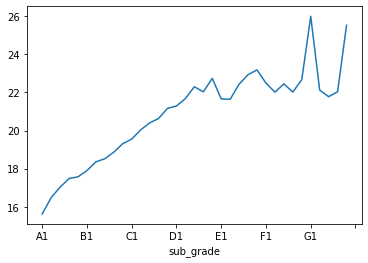

In [197]:
df.groupby(['sub_grade'])['dti'].mean().plot()

<AxesSubplot:xlabel='sub_grade', ylabel='dti'>

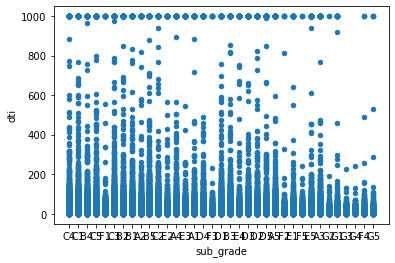

In [198]:
df[['sub_grade', 'dti']].plot.scatter('sub_grade', 'dti')

In [199]:
df['dti'].describe()

count    2.260668e+06
mean     1.956605e+01
std      3.045669e+01
min     -1.000000e+00
25%      1.190000e+01
50%      1.785000e+01
75%      2.451000e+01
max      9.990000e+02
Name: dti, dtype: float64

<AxesSubplot:>

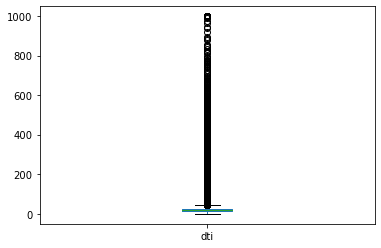

In [200]:
df['dti'].plot.box()

In [201]:
df[df.dti<30].count()

loan_amnt                                     2012926
funded_amnt                                   2012926
funded_amnt_inv                               2012926
int_rate                                      2012926
installment                                   2012926
grade                                         2012926
sub_grade                                     2012926
emp_title                                     1874453
emp_length                                    1892616
home_ownership                                2012926
annual_inc                                    2012922
verification_status                           2012926
issue_d                                       2012926
loan_status                                   2012926
pymnt_plan                                    2012926
url                                           2012926
desc                                           121264
purpose                                       2012926
title                       

In [202]:
df[df.application_type=='Individual']['dti'].mean()

18.093163823774663

In [203]:
df[df.application_type!='Individual']['dti'].mean()

45.67748024190194

In [204]:
df[df.application_type!='Individual']['dti_joint'].mean()

19.251817059632476

In [205]:
charged_off_percent.head(15)

,issue_year,sub_grade,grade,loan_status,fico,status_total,fico_total,status_percent
2,2007,A2,A,Charged Off,4,2,20,0.100000
5,2007,A3,A,Charged Off,4,1,15,0.066667
10,2007,A5,A,Charged Off,3,1,6,0.166667
13,2007,B1,B,Charged Off,3,2,8,0.250000
16,2007,B2,B,Charged Off,3,2,9,0.222222
17,2007,B2,B,Charged Off,4,1,3,0.333333
21,2007,B3,B,Charged Off,3,2,17,0.117647
22,2007,B3,B,Charged Off,4,1,4,0.250000
25,2007,B4,B,Charged Off,3,3,18,0.166667
26,2007,B4,B,Charged Off,4,1,5,0.200000


In [206]:
not_current_percent.head(20)

,issue_year,sub_grade,grade,loan_status,fico,status_total,fico_total,status_percent
1072,2013,B4,B,Not Current,3,1,8884,0.000113
1105,2013,C3,C,Not Current,3,1,6477,0.000154
1115,2013,C4,C,Not Current,2,1,1461,0.000684
1214,2013,F3,F,Not Current,3,1,622,0.001608
1299,2014,A5,A,Not Current,3,3,8317,0.000361
1300,2014,A5,A,Not Current,4,1,1548,0.000646
1313,2014,B1,B,Not Current,2,1,1038,0.000963
1314,2014,B1,B,Not Current,3,2,8219,0.000243
1315,2014,B1,B,Not Current,4,1,1268,0.000789
1328,2014,B2,B,Not Current,3,2,8892,0.000225


In [207]:
current_percent.head(20)

,issue_year,sub_grade,grade,loan_status,fico,status_total,fico_total,status_percent
1084,2013,C1,C,Current,3,1,6203,0.000161
1110,2013,C4,C,Current,3,1,6218,0.000161
1127,2013,D1,D,Current,3,1,4220,0.000237
1148,2013,D4,D,Current,3,1,2710,0.000369
1156,2013,D5,D,Current,3,1,2416,0.000414
1244,2013,G4,G,Current,2,1,23,0.043478
1280,2014,A4,A,Current,3,19,6741,0.002819
1281,2014,A4,A,Current,4,12,1712,0.007009
1282,2014,A4,A,Current,5,1,171,0.005848
1291,2014,A5,A,Current,2,5,760,0.006579


# which is a better predictor their loan grade or fico?

In [208]:
fully_paid_percent = fully_paid_percent.loc[fully_paid_percent['issue_year']<2015].sort_values('status_percent', ascending=False)

In [209]:
paid_year_fico = fully_paid_percent.groupby(['issue_year', 'fico'])['status_total', 'fico_total'].sum().reset_index()
paid_year_fico['percent'] = [x for x in paid_year_fico['status_total']/paid_year_fico['fico_total']]

In [210]:
paid_year_sub_grade = fully_paid_percent.groupby(['issue_year', 'sub_grade'])['status_total', 'fico_total'].sum().reset_index()
paid_year_sub_grade['percent'] = [x for x in paid_year_sub_grade['status_total']/paid_year_sub_grade['fico_total']]

In [211]:
paid_year_grade = fully_paid_percent.groupby(['issue_year', 'grade'])['status_total', 'fico_total'].sum().reset_index()
paid_year_grade['percent'] = [x for x in paid_year_grade['status_total']/paid_year_grade['fico_total']]

In [212]:
paid_year_fico.head(10)

,issue_year,fico,status_total,fico_total,percent
0,2007,2,154,228,0.675439
1,2007,3,200,267,0.749064
2,2007,4,79,86,0.918605
3,2007,5,12,12,1.000000
4,2008,2,434,601,0.722130
5,2008,3,1125,1420,0.792254
6,2008,4,317,350,0.905714
7,2008,5,21,22,0.954545
8,2009,2,337,420,0.802381
9,2009,3,2912,3432,0.848485


<AxesSubplot:xlabel='issue_year'>

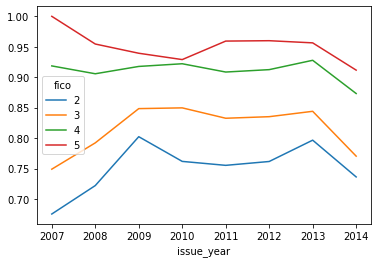

In [213]:
df_by_fico = paid_year_fico.pivot(index='issue_year', columns='fico', values='percent')
df_by_fico.plot()

In [214]:
df_by_fico

fico,2,3,4,5
issue_year,,,,
2007,0.675439,0.749064,0.918605,1.000000
2008,0.722130,0.792254,0.905714,0.954545
2009,0.802381,0.848485,0.917736,0.939394
2010,0.761818,0.849719,0.922154,0.928994
2011,0.755340,0.832672,0.908544,0.959375
2012,0.761673,0.835235,0.912486,0.960000
2013,0.796686,0.844070,0.927824,0.956446
2014,0.736310,0.770461,0.873276,0.911679


In [215]:
paid_year_sub_grade.head(10)

,issue_year,sub_grade,status_total,fico_total,percent
0,2007,A1,6,6,1.000000
1,2007,A2,24,26,0.923077
2,2007,A3,16,17,0.941176
3,2007,A4,18,18,1.000000
4,2007,A5,10,11,0.909091
5,2007,B1,14,16,0.875000
6,2007,B2,10,13,0.769231
7,2007,B3,18,21,0.857143
8,2007,B4,19,23,0.826087
9,2007,B5,21,25,0.840000


<AxesSubplot:xlabel='issue_year'>

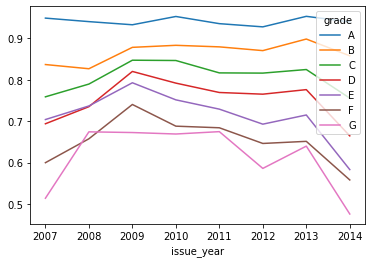

In [216]:
df_by_grade = paid_year_grade.pivot(index='issue_year', columns='grade', values='percent')
df_by_grade.plot()

In [217]:
df_by_grade

grade,A,B,C,D,E,F,G
issue_year,,,,,,,
2007,0.948718,0.836735,0.758865,0.693878,0.704082,0.600000,0.514286
2008,0.940252,0.826599,0.789655,0.735084,0.736842,0.657658,0.674419
2009,0.932668,0.878201,0.847181,0.820073,0.792763,0.740385,0.672727
2010,0.952650,0.883103,0.846464,0.791932,0.751559,0.688103,0.669173
2011,0.935349,0.879360,0.816591,0.769313,0.729155,0.684211,0.674877
2012,0.927621,0.870319,0.816069,0.765260,0.692936,0.646388,0.586207
2013,0.952995,0.898246,0.824697,0.776217,0.715059,0.651491,0.639954
2014,0.939626,0.857738,0.755697,0.664659,0.583300,0.558341,0.476219


# how much is written off per loan? and when?

In [218]:
print('Average number of months to default or payoff')
df.groupby(['issue_year', 'grade', 'term_60', 'loan_status'])['months_of_pay'].mean().reset_index().head()


Average number of months to default or payoff


,issue_year,grade,term_60,loan_status,months_of_pay
0,2007,A,0,Charged Off,24.250000
1,2007,A,0,Fully Paid,25.040541
2,2007,B,0,Charged Off,13.625000
3,2007,B,0,Fully Paid,28.109756
4,2007,C,0,Charged Off,16.617647


In [219]:
# saving current state to pickle
df.to_pickle('data/df_accep.pkl')

In [115]:
agg_counts_set = accepted.groupby(['issue_year', 'fico', 'debt_settlement_flag', 'hardship_flag'])['loan_amnt'].count().reset_index()

In [166]:
agg_counts_set.head()

NameError: name 'agg_counts_set' is not defined